Ver 2.0.1
04/05/2020 Bug Fixes:
* Example now shows correct r2 value
* Example correlation correlates against age
* bio_age: primarykey removed from possible means to be listed
* Summary.mean() calculated with numpy

In [1]:
#import import_ipynb
import bio_age as BA
import pandas as pd
import scipy as sp #scipy for regressions
import numpy as np

You are running BA_NB_Final at 2020-04-05 22:38:23.977041


# Example 1: NHANES III Dataset

In [2]:
# load training set
trainset = pd.read_csv('BioAgeSample_NHANESIII_without_fvc.txt', delimiter='\t')
trainset.head()

,seqn,bup,tcp,crp,cep,appsi,amp,ghp,age,samp_wt,cmvod,fev,female,wbc,sbp,fvc
0,4,11,160,0.21,0.7,89,4.1,4.6,32,0.183278,0.517,3089,1,12.55,126,3536
1,9,14,236,0.21,0.8,59,4.0,5.3,48,2.066707,1.946,2512,1,4.95,131,3436
2,10,14,225,0.21,1.2,74,4.5,4.6,35,2.950445,0.349,3911,0,5.90,130,4630
3,19,10,187,0.21,1.1,86,4.2,5.7,44,0.410218,3.001,2594,0,6.10,133,4080
4,34,15,216,0.21,0.8,84,3.9,5.5,42,0.534605,3.001,2331,1,5.05,100,2850


In [3]:
# find indices for age, group, primary index, sample weights
header_names = list(trainset)
age_index = header_names.index('age')
genderindex = header_names.index('female') # this is the name of the group
seqn = header_names.index('seqn')
samp_wt_index = header_names.index('samp_wt')

results = BA.KDM_model(trainset, trainset, 'cache_ex1.json', 'NHANES_eg_results', age_index, genderindex, seqn, samp_wt_index)

0.9911351120527025


In [4]:
# View Results
print('Mean residual:', results[0])
print('Median residual:', results[1])
print('Median percent residual', results[2])
print('R-squared:', results[4])

Mean residual: 1.3227190927206718
Median residual: 0.5815186882747128
Median percent residual 1.123719360943522
R-squared: 0.9823488103437232


### Show Means and Correlations

In [5]:
a = BA.Summary(trainset, age_index, samp_wt_index, seqn) # load Class

# Means
means = a.mean()


MEANS:
age		53.3239289446186
amp		4.108026975197112
appsi		87.85712928659638
bup		14.829296095753776
cep		1.1014059057005794
cmvod		2.1611983070165293
crp		0.5042661679253349
female		0.5330103543269687
fev		2771.6270542414745
fvc		3608.9115607485514
ghp		5.671663341417308
samp_wt		1.1560375776059655
sbp		128.79994300370475
tcp		211.7808492447991
wbc		nan


In [6]:
# Correlations
corrs = a.corr(age_index)

Cannot perfom correlation on wbc

CORRELATIONS: (r, p-value)
age		(0.9999999999999998, 0.0)
amp		(-0.16280593361509277, 4.293230732596376e-17)
appsi		(0.18295941907950491, 3.024436505774297e-21)
bup		(0.4206464853361341, 2.2764170841970102e-113)
cep		(0.1929747080614527, 1.6940523277356328e-23)
cmvod		(0.24717662141515234, 6.210205951002721e-38)
crp		(0.06356551916869953, 0.0011029631729718879)
female		(-0.018736856122316917, 0.3366099677598781)
fev		(-0.5935168970120468, 2.5591376671795748e-250)
fvc		(-0.4663006229179487, 3.1702116512845543e-142)
ghp		(0.22619390136641168, 6.934123005866494e-32)
samp_wt		(-0.20921505015444442, 2.026492655228501e-27)
sbp		(0.5511896768489757, 4.3373575018631186e-209)
seqn		(-0.002047103440819391, 0.9163973816970639)
tcp		(0.20965734385345042, 1.5674192567794553e-27)


### Visualize these results

In [7]:
results = pd.read_csv('NHANES_eg_results_test.csv')

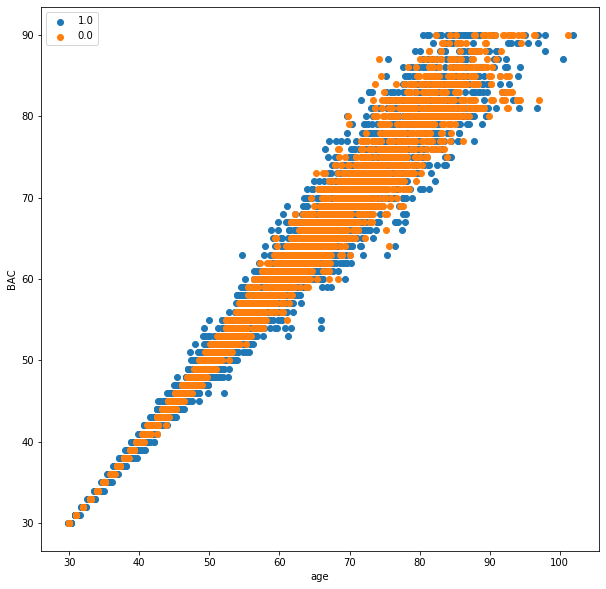

In [8]:
a = BA.Visualize(results)
a.plot('BAC','age','female')